In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv("../DATA/train.csv")
test = pd.read_csv("../DATA/test.csv")

In [4]:
train.rename(columns={'기온':'temperature', '습도' : 'huminity','풍향' : 'winddirection'}, inplace = True)
train.columns

Index(['ZIH120-02', 'PIA205B-02A_MIN', 'PIA205B-02A_MAX', 'PRESSURE-S',
       'FI_SUM', 'FY_SUM', 'TI_MEAN', 'LP_TOTAL', 'FIA_SUM', 'STN-MFR-S',
       'temperature', 'huminity', 'winddirection', 'datetime', 'lunMonth',
       'lunDay', 'lunYear'],
      dtype='object')

In [5]:
train.loc[train['PRESSURE-S'] < 60, 'PRESSURE-S'] = np.nan
test.loc[test['PRESSURE-S'] < 60, 'PRESSURE-S'] = np.nan

import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(train.loc[train['lunYear'] == 2018, 'PIA205B-02A_MIN'])
plt.plot(train.loc[train['lunYear'] == 2019, 'PIA205B-02A_MIN'])
plt.plot(train.loc[train['lunYear'] == 2020, 'PIA205B-02A_MIN'])
#plt.plot(train.loc[train['lunYear'] == 2021, 'PRESSURE-S'].reset_index())

In [6]:
train.fillna(train['PRESSURE-S'].mean(), inplace = True)
test.fillna(train['PRESSURE-S'].mean(), inplace = True)

In [7]:
train

,ZIH120-02,PIA205B-02A_MIN,PIA205B-02A_MAX,PRESSURE-S,FI_SUM,FY_SUM,TI_MEAN,LP_TOTAL,FIA_SUM,STN-MFR-S,temperature,huminity,winddirection,datetime,lunMonth,lunDay,lunYear
0,0.0,17.517700,17.560400,102.900000,14.240432,17.530398,-152.198372,669.831314,0.010940,617.457581,-2.000000,35.0,286.0,2019-01-01 00:00:00,11,26,2018
1,0.0,17.511600,17.557400,102.900000,14.207824,17.497140,-152.215958,672.204872,0.012620,617.268005,-2.000000,35.0,286.0,2019-01-01 00:10:00,11,26,2018
2,0.0,17.499399,17.520800,102.900000,14.198118,17.467668,-152.229553,671.450134,0.011329,619.613220,-2.000000,35.0,286.0,2019-01-01 00:20:00,11,26,2018
3,0.0,17.502399,17.520800,102.999219,14.205443,17.179214,-152.255989,671.490082,0.010518,614.372742,-2.000000,35.0,286.0,2019-01-01 00:30:00,11,26,2018
4,0.0,17.502399,17.517700,103.000000,14.201326,17.422440,-152.242294,671.829071,0.012176,621.035034,-2.000000,35.0,286.0,2019-01-01 00:40:00,11,26,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109723,0.0,18.066999,18.121901,102.300000,19.918104,24.414999,-147.312424,468.314369,0.008531,414.864197,6.333333,85.0,187.0,2021-01-31 23:10:00,12,19,2020
109724,0.0,18.079201,18.140301,102.300000,19.890148,24.461038,-147.253349,467.372131,0.006635,413.617401,6.333333,85.0,187.0,2021-01-31 23:20:00,12,19,2020
109725,0.0,18.082300,18.149401,102.300000,19.943161,24.456611,-147.319824,470.193420,0.008772,415.707367,6.333333,85.0,187.0,2021-01-31 23:30:00,12,19,2020
109726,0.0,18.094500,18.149401,102.300000,19.926997,24.532504,-147.309784,466.644051,0.009109,414.037781,6.333333,85.0,187.0,2021-01-31 23:40:00,12,19,2020


In [8]:
train.drop('datetime', axis = 1, inplace = True)
test.drop('datetime', axis = 1, inplace = True)

In [ ]:
summer = train.loc[(train['lunMonth'] >= 3) & (train['lunMonth'] <= 8)].index
other = train.loc[(train['lunMonth'] < 3) | (train['lunMonth'] > 8)].index

train.loc[summer, 'lunMonth'] = 1
train.loc[other, 'lunMonth'] = 0

summer = test.loc[(test['lunMonth'] >= 3) & (test['lunMonth'] <= 8)].index
other = test.loc[(test['lunMonth'] < 3) | (test['lunMonth'] > 8)].index

test.loc[summer, 'lunMonth'] = 1
test.loc[other, 'lunMonth'] = 0

In [9]:
train['BOG'] = train['FY_SUM'] + train['FIA_SUM']
test['BOG'] = test['FY_SUM'] + test['FIA_SUM']

In [10]:
train

,ZIH120-02,PIA205B-02A_MIN,PIA205B-02A_MAX,PRESSURE-S,FI_SUM,FY_SUM,TI_MEAN,LP_TOTAL,FIA_SUM,STN-MFR-S,temperature,huminity,winddirection,lunMonth,lunDay,lunYear,BOG
0,0.0,17.517700,17.560400,102.900000,14.240432,17.530398,-152.198372,669.831314,0.010940,617.457581,-2.000000,35.0,286.0,11,26,2018,17.541338
1,0.0,17.511600,17.557400,102.900000,14.207824,17.497140,-152.215958,672.204872,0.012620,617.268005,-2.000000,35.0,286.0,11,26,2018,17.509760
2,0.0,17.499399,17.520800,102.900000,14.198118,17.467668,-152.229553,671.450134,0.011329,619.613220,-2.000000,35.0,286.0,11,26,2018,17.478996
3,0.0,17.502399,17.520800,102.999219,14.205443,17.179214,-152.255989,671.490082,0.010518,614.372742,-2.000000,35.0,286.0,11,26,2018,17.189732
4,0.0,17.502399,17.517700,103.000000,14.201326,17.422440,-152.242294,671.829071,0.012176,621.035034,-2.000000,35.0,286.0,11,26,2018,17.434616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109723,0.0,18.066999,18.121901,102.300000,19.918104,24.414999,-147.312424,468.314369,0.008531,414.864197,6.333333,85.0,187.0,12,19,2020,24.423530
109724,0.0,18.079201,18.140301,102.300000,19.890148,24.461038,-147.253349,467.372131,0.006635,413.617401,6.333333,85.0,187.0,12,19,2020,24.467673
109725,0.0,18.082300,18.149401,102.300000,19.943161,24.456611,-147.319824,470.193420,0.008772,415.707367,6.333333,85.0,187.0,12,19,2020,24.465383
109726,0.0,18.094500,18.149401,102.300000,19.926997,24.532504,-147.309784,466.644051,0.009109,414.037781,6.333333,85.0,187.0,12,19,2020,24.541613


In [11]:
test

,ZIH120-02,PIA205B-02A_MIN,PIA205B-02A_MAX,PRESSURE-S,FI_SUM,FY_SUM,TI_MEAN,LP_TOTAL,FIA_SUM,STN-MFR-S,기온,습도,풍향,lunMonth,lunDay,lunYear,BOG
0,0,18.192101,18.225700,102.2,22.164979,29.458889,-147.915573,504.585892,0.009701,420.318573,10.0,70.000000,225.000000,1,18,2021,29.468590
1,1,18.183001,18.225700,102.0,22.186504,29.416094,-147.939224,505.000870,0.011375,419.836670,10.0,73.333333,224.333333,1,18,2021,29.427468
2,1,18.149401,18.204300,102.0,22.131447,29.395026,-147.906815,506.194719,0.010386,417.692688,10.0,73.333333,224.333333,1,18,2021,29.405412
3,1,18.134199,18.164700,102.0,22.172283,29.521853,-147.959694,506.877647,0.008853,418.850067,10.0,73.333333,224.333333,1,18,2021,29.530706
4,1,18.094500,18.146400,102.0,22.186551,29.256739,-147.968811,505.971756,0.010260,417.646027,10.0,73.333333,224.333333,1,18,2021,29.266999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33043,0,17.807600,17.847300,101.3,15.917591,19.293876,-150.812553,617.455345,0.007032,529.854431,-3.0,30.000000,274.000000,11,28,2021,19.300908
33044,0,17.804600,17.841200,101.3,15.912604,19.651233,-150.836823,618.697479,0.010130,528.398926,-3.0,30.000000,274.000000,11,28,2021,19.661364
33045,0,17.798500,17.832001,101.3,15.952869,19.577471,-150.836304,618.060310,0.006596,526.316467,-3.0,30.000000,274.000000,11,28,2021,19.584067
33046,0,17.767900,17.832001,101.3,15.930380,19.566207,-150.817444,619.041084,0.007297,528.483826,-3.0,30.000000,274.000000,11,28,2021,19.573504


In [12]:
train['new'] = (train['LP_TOTAL'] / train['FY_SUM'] ) - 12
train['LB'] = (train['LP_TOTAL'] / train['BOG'] )
train['LT'] = (train['FI_SUM'] + train['FY_SUM'] + train['LP_TOTAL']) / train['TI_MEAN']
train['PT'] = ((train['PIA205B-02A_MIN'] + train['PIA205B-02A_MAX']) / 2) / (train['temperature'] + 273.15) # 샤를의 법칙

test['new'] = (test['LP_TOTAL'] / test['FY_SUM'] ) - 12
test['LB'] = (test['LP_TOTAL'] / test['BOG'] )
test['LT'] = (test['FI_SUM'] + test['FY_SUM'] + test['LP_TOTAL']) / test['TI_MEAN']
test['PT'] = ((test['PIA205B-02A_MIN'] + test['PIA205B-02A_MAX']) / 2) / (test['기온'] + 273.15)

['MalgunGothic']


findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

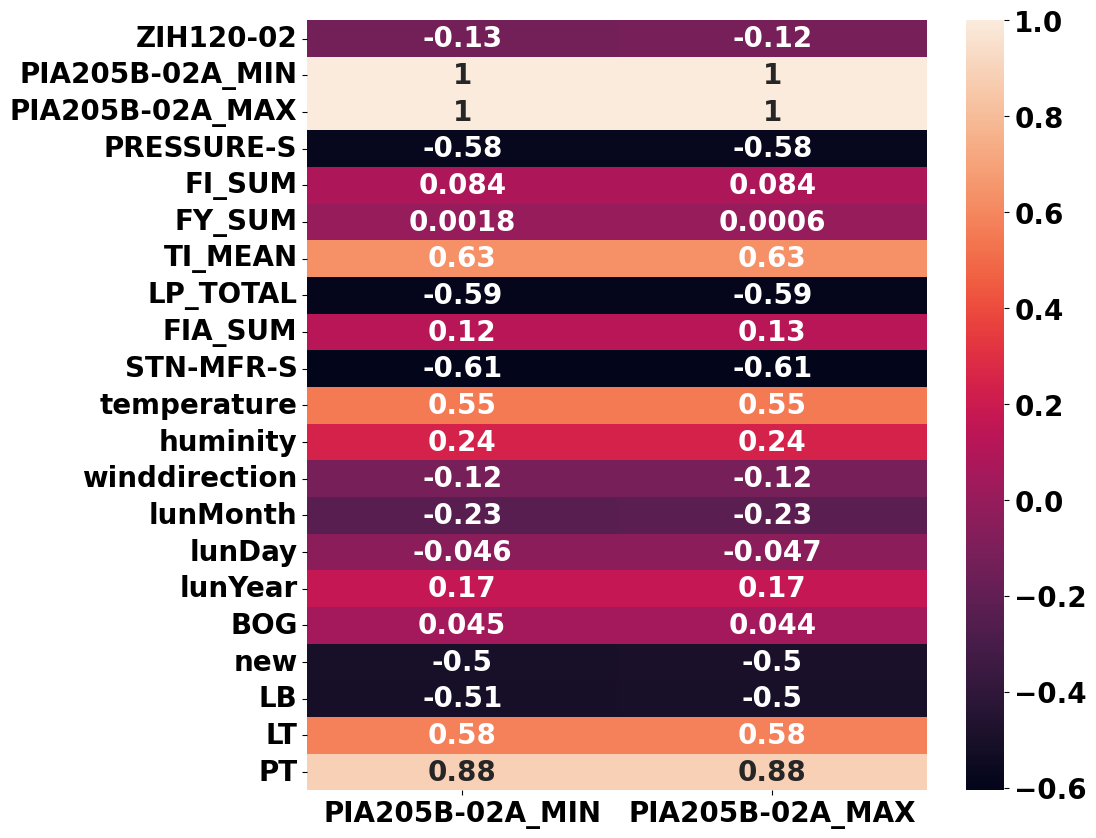

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='MalgunGothic')
print(plt.rcParams['font.family'])
plt.figure(figsize = (10,10))
plt.rc('font', size=20, weight="bold")
sns.heatmap(train.corr()[["PIA205B-02A_MIN", "PIA205B-02A_MAX"]], annot = True)

In [87]:
train.drop(['습도', '풍향','lunDay','lunYear','lunMonth','FIA_SUM', 'FI_SUM', 'FY_SUM','BOG' ], axis = 1, inplace = True)
test.drop(['습도', '풍향','lunDay','lunYear','lunMonth','FIA_SUM', 'FI_SUM', 'FY_SUM','BOG'], axis = 1, inplace = True)

In [88]:
train.columns

Index(['ZIH120-02', 'PIA205B-02A_MIN', 'PIA205B-02A_MAX', 'PRESSURE-S',
       'TI_MEAN', 'LP_TOTAL', 'STN-MFR-S', '기온', 'new', 'LB', 'LT', 'PT'],
      dtype='object')

In [89]:
train_data_tmp = train.copy()
shift1 = train_data_tmp.shift(-1)
shift2 = train_data_tmp.shift(-2)
shift3 = train_data_tmp.shift(-3)
shift4 = train_data_tmp.shift(-4)
shift5 = train_data_tmp.shift(-5)

shift5 = shift5[['PIA205B-02A_MIN', 'PIA205B-02A_MAX']]

In [90]:
###### COLNAME UNIQUE
shifting_data = [shift1,shift2,shift3,shift4,shift5]
for i in range(len(shifting_data)) :
    shifting_data[i].columns = [col_name + "_" + str(i) for col_name in shifting_data[i].columns]
###### CONCAT AND MERGEING
shifting_data = pd.concat(shifting_data, axis = 1)
train_data = pd.concat([train,shifting_data],axis = 1)
#imp_train.drop(columns = ["TIME_0","TIME_1",'TIME_2','TIME_3'], inplace = True)
# ###### DROPNA
train_data.dropna(inplace = True)

In [91]:
def TEST_DATA_CLEANING(test_data) :
    ### TEST DATA
    ##### SHIFTING
    test_data_tmp = test_data.copy()

    shift1 = test_data_tmp.shift(-1)
    shift2 = test_data_tmp.shift(-2)
    shift3 = test_data_tmp.shift(-3)
    shift4 = test_data_tmp.shift(-4)

    ###### COLNAME UNIQUE
    shifting_data = [shift1,shift2,shift3, shift4]
    for i in range(len(shifting_data)) :
        shifting_data[i].columns = [col_name + "_" + str(i) for col_name in shifting_data[i].columns]
    ###### CONCAT AND MERGEING
    shifting_data = pd.concat(shifting_data, axis = 1)
    test_data = pd.concat([test_data,shifting_data],axis = 1)
    #test_data.drop(columns = ["TIME_0","TIME_1",'TIME_2','TIME_3'], inplace = True)
    ###### DROPNA
    test_data.dropna(inplace = True)
    return test_data

In [92]:
test_data_list = []
for i in range(int(test.shape[0]/6)) :
    temp = test.iloc[i*6:(i+1)*6]
    temp.reset_index(drop = True, inplace = True)
    test_data_list.append(temp)
for i in range(len(test_data_list)) :
    test_data_list[i] = TEST_DATA_CLEANING(test_data_list[i])
test_data = pd.concat(test_data_list)
test_data.reset_index(inplace=True, drop=True)

In [93]:
test_data_list_2 = []
for i in range(int(test_data.shape[0]/2)):
    temp = test_data.iloc[[(i+1)*2-1]]
    temp.reset_index(drop = True, inplace = True)
    test_data_list_2.append(temp)
test_data2 = pd.concat(test_data_list_2)

In [94]:
train_label = train_data[['PIA205B-02A_MIN_4', 'PIA205B-02A_MAX_4']]
train_data = train_data.drop(columns=['PIA205B-02A_MIN_4', 'PIA205B-02A_MAX_4'], axis = 1)

### TRAIN

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size = 0.2, random_state = 22)

rf = RandomForestRegressor(n_estimators = 200,random_state = 22)
rf.fit(x_train, y_train)
val_pred = rf.predict(x_val)
print(mean_absolute_error(y_val, val_pred))

0.011157492290319478


In [104]:
rf = RandomForestRegressor(n_estimators = 200,random_state = 22)
rf.fit(train_data, train_label)

RandomForestRegressor(n_estimators=200, random_state=22)

### INFERENCE

In [106]:
pred = rf.predict(test_data2)
pred

array([[18.05504839, 18.09518306],
       [17.45613835, 17.52546464],
       [16.77081941, 16.90078155],
       ...,
       [17.87265594, 17.910827  ],
       [17.80317015, 17.83562042],
       [17.75241863, 17.79613669]])

In [23]:
sub = pd.read_csv("../DATA/submission.csv")
sub['PIA205B-02A_MIN'] = pred[:,0]
sub['PIA205B-02A_MAX'] = pred[:,1]

In [24]:
sub

,Unnamed: 0,TIME,PIA205B-02A_MIN,PIA205B-02A_MAX
0,0,2021-03-01 01:00:00,18.055048,18.095183
1,1,2021-03-01 02:20:00,17.456138,17.525465
2,2,2021-03-01 03:40:00,16.770819,16.900782
3,3,2021-03-01 05:00:00,16.563629,16.656026
4,4,2021-03-01 06:20:00,16.760345,16.832253
...,...,...,...,...
5503,5503,2021-12-31 18:20:00,17.966131,18.002948
5504,5504,2021-12-31 19:40:00,17.870734,17.918354
5505,5505,2021-12-31 21:00:00,17.872656,17.910827
5506,5506,2021-12-31 22:20:00,17.803170,17.835620


In [25]:
sub.to_csv("final_rf.csv", index = False) # 0.03559